# Análisis de Robos a Transeúntes en Vía Pública

Este notebook realiza un análisis de robos a transeúntes en vía pública con y sin violencia en la Ciudad de México. Se incluyen la carga y limpieza de datos, análisis exploratorio y visualización geoespacial.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as sg
import seaborn as sns
import numpy as np

# sns.set(style="whitegrid")

## 1. Carga y Limpieza de Datos de Crímenes

Cargamos los datos de delitos y realizamos una limpieza inicial.


In [2]:
# Carga de datos de crímenes
crimen = pd.read_csv('delitos.csv', skiprows=1)

# Corrección de nombres de alcaldías
crimen.replace('GUSTAVO A MADERO', 'GUSTAVO A. MADERO', inplace=True)

# Información general del DataFrame
print(f"Dimensiones del DataFrame: {crimen.shape}")
crimen.head()

Dimensiones del DataFrame: (32196, 19)


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
0,1,8601246,01/01/2020,11:05,H1,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA BLANCA,01/01/2020,09:55,F.C. NACIONALES DE MEXICO,AND. NUEVA GALICIA,NUEVA ESPAÑA,AZCAPOTZALCO,AZ-1,-99.18972843,19.49874581,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
1,2,8601195,01/01/2020,05:59,2,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,04:50,15 Y AVENIDA GUADALUPE,SIN REGISTRO,GUADALUPE PROLETARIA,GUSTAVO A. MADERO,GAM-2,-99.15697157,19.52171133,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
2,3,8601218,01/01/2020,08:43,2,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,07:30,PIRULES,SIN REGISTRO,TLALPEXCO,GUSTAVO A. MADERO,GAM-1,-99.12876972,19.54421028,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
3,4,8601245,01/01/2020,11:04,IZP-9,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,11:00,elisa,SIN REGISTRO,2A. AMPLIACIÓN SANTIAGO ACAHUALTEPEC,IZTAPALAPA,IZP-10,-99.01514062,19.34773094,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
4,5,8601242,01/01/2020,10:53,H3,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR GOLPES,30/12/2019,06:30,DALIA,JOSEFA ORTIZ DE DOMINGUEZ,BARRIO SAN ESTEBAN,XOCHIMILCO,XO-2,-99.09859972,19.26437498,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


### Exploración de Columnas y Tipos de Delitos

Revisamos las columnas disponibles y la distribución de los tipos de delitos.

In [3]:
# Exploración de columnas y conteo de tipos de delitos
print("Columnas del DataFrame:", crimen.columns.tolist())
print("\nConteo de tipos de delitos:")
print(crimen['DELITO'].value_counts())


Columnas del DataFrame: ['ID', 'ID_CI', 'FECHA DE INICIO', 'HORA DE INICIO', 'CT - INICIO AP', 'TIPO IMPACTO', 'DELITO', 'MODALIDAD - DELITO', 'FECHA DE LOS HECHOS', 'HORA DE LOS HECHOS', 'CALLE 1 HECHOS', 'CALLE 2 HECHOS', 'COLONIA HECHOS', 'ALCALDÍA HECHOS', 'CT HECHOS', 'COORD X', 'COORD Y', 'OBSERVACIÓN', 'Unnamed: 18']

Conteo de tipos de delitos:
DELITO
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       10189
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                       10018
ROBO A NEGOCIO CON VIOLENCIA                                3514
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       2349
VIOLACIÓN                                                   1505
HOMICIDIO DOLOSO                                            1206
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                871
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        782
ROBO A CASA HABITACIÓN CON VIOLENCIA                         633
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENC

### Filtrado de Robos a Transeúntes en Vía Pública

Filtramos el DataFrame para mantener solo los robos a transeúntes en vía pública con y sin violencia.


In [4]:
# Filtrado de delitos específicos
crimen = crimen[crimen['DELITO'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA']
print(f"Dimensiones después del filtrado: {crimen.shape}")
crimen.head()


Dimensiones después del filtrado: (10189, 19)


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
15,16,8601220,01/01/2020,09:28,AZ-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,08:49,AV. EL ROSARIO,CULTURA NORTE,EL ROSARIO,AZCAPOTZALCO,AZ-1,-99.20273257,19.50148613,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
16,17,8601417,01/01/2020,20:57,BJ-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,19:45,CERRADA DE MIGUEL NEGRETE,BOLIVAR,NIÑOS HÉROES,BENITO JUAREZ,BJ-3,-99.14583393,19.38568257,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
17,18,8601175,01/01/2020,01:33,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,00:50,AV. PASEO DE LA REFORMA,SIN REGISTRO,CUAUHTÉMOC,CUAUHTEMOC,CUH-5,-99.16452756,19.42931902,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
18,19,8601353,01/01/2020,16:44,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,15:30,LUIS MOYA,PUGIBET,CENTRO,CUAUHTEMOC,CUH-6,-99.14571496,19.42973786,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
19,20,8601367,01/01/2020,17:52,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,17:20,MANUEL DE LAPEÑA Y PEÑA,GONZALEZ ORTEGA,CENTRO,CUAUHTEMOC,CUH-4,-99.12597352,19.44014235,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


### Agrupación de Robos por Alcaldía

Agrupamos los robos por alcaldía para obtener el conteo de incidentes por cada una.


In [5]:
# Agrupación de robos por alcaldía
robos_alcaldia = crimen.groupby('ALCALDÍA HECHOS')['DELITO'].count()
print("Robos por Alcaldía:")
print(robos_alcaldia)


Robos por Alcaldía:
ALCALDÍA HECHOS
ALVARO OBREGON             858
AZCAPOTZALCO               507
BENITO JUAREZ              586
COYOACAN                   561
CUAJIMALPA DE MORELOS       70
CUAUHTEMOC                1386
GUSTAVO A. MADERO          983
IZTACALCO                  458
IZTAPALAPA                1898
LA MAGDALENA CONTRERAS     123
MIGUEL HIDALGO             934
MILPA ALTA                  54
SIN REGISTRO                 2
TLAHUAC                    337
TLALPAN                    329
VENUSTIANO CARRANZA        808
XOCHIMILCO                 295
Name: DELITO, dtype: int64


## 2. Carga y Procesamiento de Datos de Población

Cargamos los datos de población y los agrupamos por alcaldía para analizarlos junto con los datos de robos.


In [6]:
# Carga de datos de población
poblacion = pd.read_csv('poblacion.csv')
poblacion.head()

,alcaldia,localidad,sexo,rango_edad,poblacion
0,AZCAPOTZALCO,Azcapotzalco,Hombre,a) 0 a 4 años,10794
1,AZCAPOTZALCO,Azcapotzalco,Hombre,b) 5 a 9 años,11950
2,AZCAPOTZALCO,Azcapotzalco,Hombre,c) 10 a 14 años,13219
3,AZCAPOTZALCO,Azcapotzalco,Hombre,d) 15 a 19 años,14272
4,AZCAPOTZALCO,Azcapotzalco,Hombre,e) 20 a 24 años,15895


### Agrupación de Población por Alcaldía

Sumamos la población total por cada alcaldía.


In [7]:
# Agrupación de población por alcaldía
poblacion_alcaldia = poblacion.groupby('alcaldia')['poblacion'].sum()
print("Población por Alcaldía:")
print(poblacion_alcaldia)

Población por Alcaldía:
alcaldia
ALVARO OBREGON             758180
AZCAPOTZALCO               431840
BENITO JUAREZ              434115
COYOACAN                   614319
CUAJIMALPA DE MORELOS      216398
CUAUHTEMOC                 545818
GUSTAVO A. MADERO         1173117
IZTACALCO                  404517
IZTAPALAPA                1835091
LA MAGDALENA CONTRERAS     246385
MIGUEL HIDALGO             408544
MILPA ALTA                 135926
TLAHUAC                    388687
TLALPAN                    692545
VENUSTIANO CARRANZA        443289
XOCHIMILCO                 434406
Name: poblacion, dtype: int64


### Combinación de Datos de Robos y Población

Combinamos los datos de robos con los de población y calculamos la tasa de robos por cada 100,000 habitantes.


In [8]:
# Combinación de datos de robos y población
robos_poblacion_df = pd.DataFrame({
    'robos': robos_alcaldia,
    'poblacion': poblacion_alcaldia
}).dropna()

# Cálculo de la tasa de robos por 100,000 habitantes
robos_poblacion_df['tasa_robos'] = (robos_poblacion_df['robos'] / robos_poblacion_df['poblacion']) * 100000
robos_poblacion_df

,robos,poblacion,tasa_robos
ALVARO OBREGON,858,758180.0,113.165739
AZCAPOTZALCO,507,431840.0,117.404594
BENITO JUAREZ,586,434115.0,134.987273
COYOACAN,561,614319.0,91.320633
CUAJIMALPA DE MORELOS,70,216398.0,32.347804
CUAUHTEMOC,1386,545818.0,253.930797
GUSTAVO A. MADERO,983,1173117.0,83.793859
IZTACALCO,458,404517.0,113.221447
IZTAPALAPA,1898,1835091.0,103.428113
LA MAGDALENA CONTRERAS,123,246385.0,49.921870


## 3. Filtrado de Alcaldías de Interés y Limpieza de Coordenadas

Seleccionamos las alcaldías de interés y limpiamos las coordenadas geográficas para asegurar la calidad de los datos geoespaciales.


In [9]:
# Definición de alcaldías de interés
alcaldias_interes = ['CUAUHTEMOC', 'GUSTAVO A. MADERO', 'CUAJIMALPA DE MORELOS']

# Filtrado de crímenes por alcaldías de interés
crimen = crimen[crimen['ALCALDÍA HECHOS'].isin(alcaldias_interes)]

# Conversión de coordenadas a numéricas
crimen['COORD X'] = pd.to_numeric(crimen['COORD X'], errors='coerce')
crimen['COORD Y'] = pd.to_numeric(crimen['COORD Y'], errors='coerce')

# Eliminación de filas con coordenadas faltantes
crimen = crimen.dropna(subset=['COORD X', 'COORD Y'])

# Reagrupación de robos por alcaldía después del filtrado
robos_alcaldia = crimen.groupby('ALCALDÍA HECHOS')['DELITO'].count()
print("Robos por Alcaldía después del filtrado:")
print(robos_alcaldia)

Robos por Alcaldía después del filtrado:
ALCALDÍA HECHOS
CUAJIMALPA DE MORELOS      69
CUAUHTEMOC               1380
GUSTAVO A. MADERO         978
Name: DELITO, dtype: int64


In [10]:
# Verificación de columnas y datos
print("Columnas del DataFrame de crímenes:", crimen.columns.tolist())
crimen.head()


Columnas del DataFrame de crímenes: ['ID', 'ID_CI', 'FECHA DE INICIO', 'HORA DE INICIO', 'CT - INICIO AP', 'TIPO IMPACTO', 'DELITO', 'MODALIDAD - DELITO', 'FECHA DE LOS HECHOS', 'HORA DE LOS HECHOS', 'CALLE 1 HECHOS', 'CALLE 2 HECHOS', 'COLONIA HECHOS', 'ALCALDÍA HECHOS', 'CT HECHOS', 'COORD X', 'COORD Y', 'OBSERVACIÓN', 'Unnamed: 18']


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
17,18,8601175,01/01/2020,01:33,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,00:50,AV. PASEO DE LA REFORMA,SIN REGISTRO,CUAUHTÉMOC,CUAUHTEMOC,CUH-5,-99.164528,19.429319,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
18,19,8601353,01/01/2020,16:44,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,15:30,LUIS MOYA,PUGIBET,CENTRO,CUAUHTEMOC,CUH-6,-99.145715,19.429738,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
19,20,8601367,01/01/2020,17:52,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,17:20,MANUEL DE LAPEÑA Y PEÑA,GONZALEZ ORTEGA,CENTRO,CUAUHTEMOC,CUH-4,-99.125974,19.440142,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
20,21,8601169,01/01/2020,00:30,CUH-6,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,19/10/2019,14:40,REPUBLICA DE COLOMBIA,CARMEN,CENTRO,CUAUHTEMOC,CUH-4,-99.129393,19.438092,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
30,31,8601265,01/01/2020,11:54,TUR-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,31/12/2019,23:25,COPENHAGUE,PASEO DE LA REFORMA,JUÁREZ,CUAUHTEMOC,CUH-5,-99.164472,19.428443,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


### Filtrado de Datos de Población por Alcaldías de Interés

Aseguramos que los datos de población correspondan únicamente a las alcaldías de interés seleccionadas.


In [11]:
# Filtrado de población por alcaldías de interés
poblacion = poblacion[poblacion['alcaldia'].isin(alcaldias_interes)]
poblacion_alcaldia = poblacion.groupby('alcaldia')['poblacion'].sum()
print("Población por Alcaldía después del filtrado:")
print(poblacion_alcaldia)


Población por Alcaldía después del filtrado:
alcaldia
CUAJIMALPA DE MORELOS     216398
CUAUHTEMOC                545818
GUSTAVO A. MADERO        1173117
Name: poblacion, dtype: int64


In [12]:
# Verificación de columnas y datos de población
print("Columnas del DataFrame de población:", poblacion.columns.tolist())
poblacion.head()


Columnas del DataFrame de población: ['alcaldia', 'localidad', 'sexo', 'rango_edad', 'poblacion']


,alcaldia,localidad,sexo,rango_edad,poblacion
72,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,a) 0 a 4 años,6079
73,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,b) 5 a 9 años,6559
74,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,c) 10 a 14 años,6708
75,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,d) 15 a 19 años,7108
76,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,e) 20 a 24 años,7472


## 4. Análisis Geoespacial

Realizamos un análisis geoespacial para visualizar los robos en el mapa de la Ciudad de México.


### 4.1. Carga del Mapa Base

Cargamos el archivo GeoJSON que contiene la información geoespacial de las alcaldías.


In [13]:
# Ruta al archivo GeoJSON
ruta_geojson = 'mapa.json'

# Carga del mapa base
agebs = gpd.read_file(ruta_geojson)
agebs.head(20)

ERROR 1: PROJ: proj_create_from_database: Open of /home/erik/miniconda3/share/proj failed


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,09003,09,003,Coyoacán,Ciudad de México,275,276,5362.231427,33293.881387,"POLYGON ((-99.13984 19.35692, -99.13923 19.356..."
1,09007,09,007,Iztapalapa,Ciudad de México,276,277,11252.806399,55993.681263,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
2,09008,09,008,La Magdalena Contreras,Ciudad de México,277,278,6307.476712,47546.085775,"POLYGON ((-99.21993 19.31226, -99.22047 19.311..."
3,09009,09,009,Milpa Alta,Ciudad de México,278,279,29672.886592,76023.989271,"POLYGON ((-98.96853 19.21057, -98.96838 19.210..."
4,09010,09,010,Álvaro Obregón,Ciudad de México,279,280,9535.832693,78321.140148,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
5,09011,09,011,Tláhuac,Ciudad de México,280,281,8538.328298,55680.003825,"POLYGON ((-98.96045 19.32537, -98.96036 19.325..."
6,09012,09,012,Tlalpan,Ciudad de México,281,282,31285.267302,100582.296823,"POLYGON ((-99.19811 19.30300, -99.19776 19.302..."
7,09013,09,013,Xochimilco,Ciudad de México,282,283,11350.430151,60393.366898,"POLYGON ((-99.09908 19.32044, -99.09906 19.320..."
8,09006,09,006,Iztacalco,Ciudad de México,283,284,2296.278473,27292.399827,"POLYGON ((-99.05579 19.42214, -99.05584 19.421..."
9,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459..."


### 4.2. Creación del GeoDataFrame de Crímenes

Convertimos las coordenadas de los crímenes en geometrías geoespaciales.


In [14]:
# Creación de geometrías a partir de coordenadas
crimen['geometry'] = crimen.apply(lambda row: sg.Point(row['COORD X'], row['COORD Y']), axis=1)
crimen_gdf = gpd.GeoDataFrame(crimen, geometry='geometry')

# Asignación del CRS (Sistema de Referencia de Coordenadas)
crimen_gdf.set_crs(agebs.crs, inplace=True)
print("CRS del mapa base:", agebs.crs)
print("CRS de crímenes:", crimen_gdf.crs)


CRS del mapa base: EPSG:4326
CRS de crímenes: EPSG:4326


### 4.3. Visualización de los Crímenes en el Mapa

Creamos una visualización geoespacial de los robos sobre el mapa de las alcaldías seleccionadas.


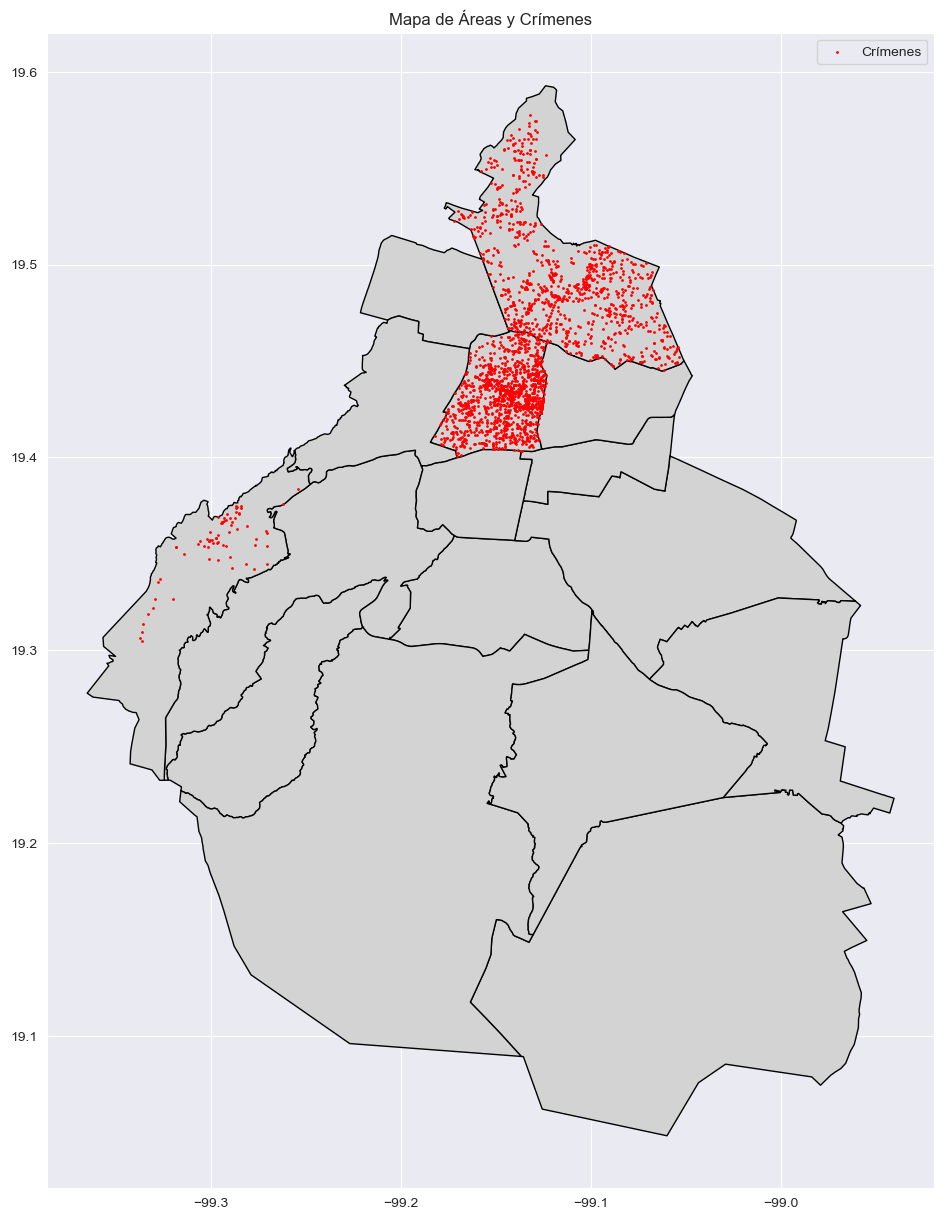

In [15]:
# Configuración de la figura
fig, ax = plt.subplots(figsize=(15, 15))  # Tamaño aumentado para mejor visualización

# Plot del mapa base
agebs.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot de los crímenes
crimen_gdf.plot(ax=ax, markersize=1, color='red', alpha=1, marker='o', label='Crímenes')

# Ajuste de los límites del mapa con un margen
xmin, ymin, xmax, ymax = agebs.total_bounds
margin_x = (xmax - xmin) * 0.05
margin_y = (ymax - ymin) * 0.05
ax.set_xlim(xmin - margin_x, xmax + margin_x)
ax.set_ylim(ymin - margin_y, ymax + margin_y)

# Añadir leyenda y título
plt.legend()
plt.title('Mapa de Áreas y Crímenes')
plt.show()

### 4.4. Filtrado del Mapa Base por Alcaldías de Interés

Filtramos el mapa base para incluir solo las alcaldías de interés.

In [16]:
# Filtrado del mapa base por alcaldías de interés
agebs = agebs[agebs['NOMGEO'].isin(alcaldias_interes)]
agebs.head()


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
9,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459..."
13,09005,09,005,GUSTAVO A. MADERO,Ciudad de México,288,289,8737.830624,56403.558051,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
14,09004,09,004,CUAJIMALPA DE MORELOS,Ciudad de México,289,290,7076.185866,66252.498897,"POLYGON ((-99.25581 19.40357, -99.25567 19.403..."


## 5. Análisis de Variables Independientes

Analizamos la densidad de población como una variable independiente que puede influir en la incidencia de robos.


### 5.1. Densidad de poblacion

Calculamos el área de cada alcaldía en kilómetros cuadrados.


In [17]:
# Cálculo del área en km²
agebs['area_km2'] = agebs['AREA'] / 100  # Asumiendo que el área original está en hectáreas

# Creación del DataFrame de áreas
area_alcaldia = agebs[['NOMGEO', 'AREA', 'area_km2']].copy()
print("Columnas del DataFrame de áreas:", area_alcaldia.columns.tolist())
area_alcaldia.head()


Columnas del DataFrame de áreas: ['NOMGEO', 'AREA', 'area_km2']


/home/erik/miniconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,NOMGEO,AREA,area_km2
9,CUAUHTEMOC,3233.524482,32.335245
13,GUSTAVO A. MADERO,8737.830624,87.378306
14,CUAJIMALPA DE MORELOS,7076.185866,70.761859


In [18]:
# Creación del DataFrame de población por alcaldía
poblacion_alcaldia_df = poblacion_alcaldia.reset_index()
poblacion_alcaldia_df.columns = ['NOMGEO', 'poblacion']
print("Columnas del DataFrame de población:", poblacion_alcaldia_df.columns.tolist())
poblacion_alcaldia_df.head()

Columnas del DataFrame de población: ['NOMGEO', 'poblacion']


,NOMGEO,poblacion
0,CUAJIMALPA DE MORELOS,216398
1,CUAUHTEMOC,545818
2,GUSTAVO A. MADERO,1173117


In [19]:
# Unión de área y población
densidad_df = area_alcaldia.merge(poblacion_alcaldia_df, on='NOMGEO')

# Cálculo de la densidad de población
densidad_df['densidad_poblacion'] = densidad_df['poblacion'] / densidad_df['area_km2']
densidad_df = densidad_df[['NOMGEO', 'densidad_poblacion']]
densidad_df.head()

,NOMGEO,densidad_poblacion
0,CUAUHTEMOC,16879.971159
1,GUSTAVO A. MADERO,13425.723734
2,CUAJIMALPA DE MORELOS,3058.116394


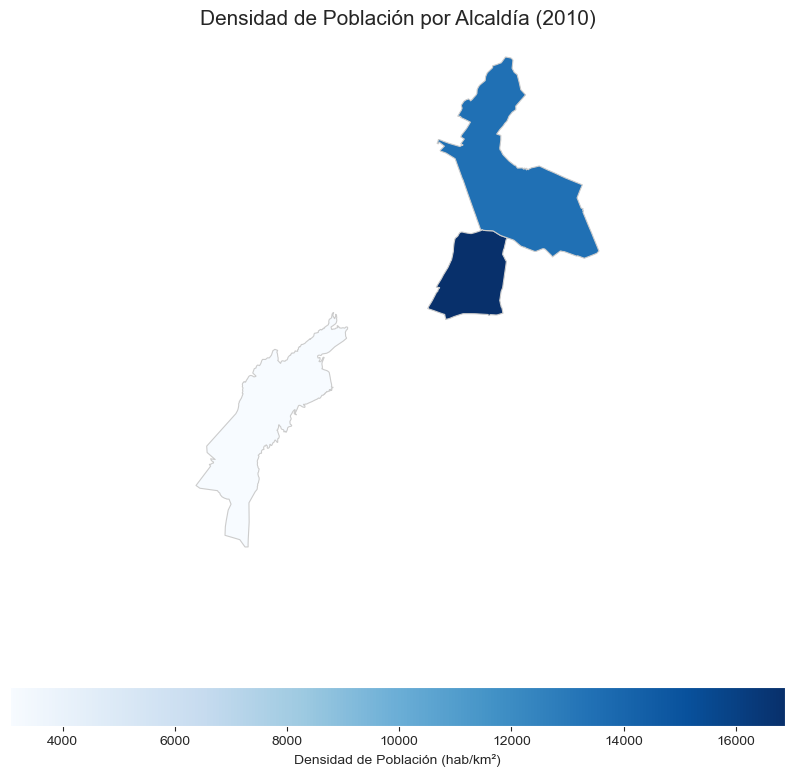

/tmp/ipykernel_18128/1417239059.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NOMGEO', y='densidad_poblacion', data=densidad_df, palette='Blues_d')


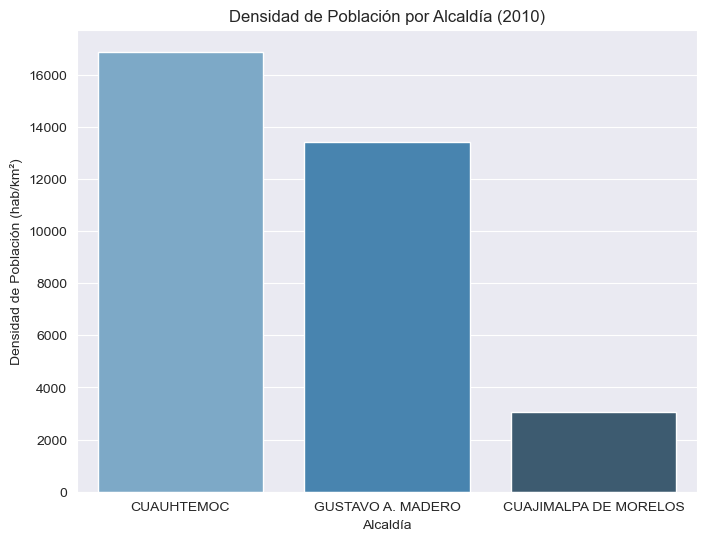

In [20]:
# 5.1.1. Merge densidad_df with agebs
agebs = agebs.merge(densidad_df, on='NOMGEO')

# 5.1.2. Visualización de la Densidad de Población en un Mapa Choropleth
fig, ax = plt.subplots(figsize=(10, 10))

agebs.plot(column='densidad_poblacion',
           cmap='Blues',
           linewidth=0.8,
           ax=ax,
           edgecolor='0.8',
           legend=True,
           legend_kwds={'label': "Densidad de Población (hab/km²)",
                       'orientation': "horizontal"})

plt.title('Densidad de Población por Alcaldía (2010)', fontsize=15)
plt.axis('off')
plt.show()

# 5.1.3. Visualización de la Densidad de Población en un Gráfico de Barras
plt.figure(figsize=(8, 6))
sns.barplot(x='NOMGEO', y='densidad_poblacion', data=densidad_df, palette='Blues_d')

plt.xlabel('Alcaldía')
plt.ylabel('Densidad de Población (hab/km²)')
plt.title('Densidad de Población por Alcaldía (2010)')
plt.show()


### 5.2. Datos de Escolaridad

En esta sección, incorporamos el dataset `escolaridad.csv`, que contiene información sobre indicadores educativos por municipio en la Ciudad de México para el año 2020. Analizaremos estos datos en el contexto de las alcaldías de interés seleccionadas previamente.


In [21]:
# Carga del dataset de escolaridad
escolaridad = pd.read_csv('escolaridad.csv')
escolaridad = escolaridad[['Municipio', 'Grado de escolaridad promedio']]

# Mostrar las primeras filas del dataset
print("Dimensiones del Dataset de Escolaridad:", escolaridad.shape)
escolaridad.head()

Dimensiones del Dataset de Escolaridad: (17, 2)


,Municipio,Grado de escolaridad promedio
0,Ciudad de México,11.48
1,Azcapotzalco,11.91
2,Coyoacán,12.51
3,CUAJIMALPA DE MORELOS,11.44
4,GUSTAVO A. MADERO,11.32


#### Descripción de las Columnas

El dataset de escolaridad contiene las siguientes columnas:

1. **Clave municipio**: Código numérico único que identifica cada municipio.
2. **Municipio**: Nombre del municipio correspondiente a la clave.
3. **Población que no asiste a la escuela de 3 a 5 años (%)**: Porcentaje de la población de 3 a 5 años que no asiste a la escuela.
4. **Población que no asiste a la escuela de 6 a 11 años (%)**: Porcentaje de la población de 6 a 11 años que no asiste a la escuela.
5. **Población que no asiste a la escuela de 12 a 14 años (%)**: Porcentaje de la población de 12 a 14 años que no asiste a la escuela.
6. **Población que asiste a la escuela de 15 a 17 años (%)**: Porcentaje de la población de 15 a 17 años que asiste a la escuela.
7. **Población que no sabe leer y escribir (%, 15 años o más)**: Porcentaje de la población mayor de 15 años que no sabe leer y escribir.
8. **Grado de escolaridad promedio**: Promedio de los años de escolaridad alcanzados por la población.
9. **Índice de marginación**: Nivel de marginación del municipio (todos los municipios tienen la clasificación "Muy bajo").


#### Filtrado de Alcaldías de Interés

Filtramos el dataset de escolaridad para mantener únicamente las alcaldías de interés previamente definidas:
- CUAUHTEMOC
- GUSTAVO A. MADERO
- CUAJIMALPA DE MORELOS

Esto nos permitirá realizar un análisis más enfocado y relevante.


In [22]:
# Filtrado de escolaridad por alcaldías de interés
escolaridad = escolaridad[escolaridad['Municipio'].isin(alcaldias_interes)]

# Mostrar las primeras filas del dataset filtrado
print("Dimensiones del Dataset de Escolaridad Filtrado:", escolaridad.shape)
escolaridad.head()

Dimensiones del Dataset de Escolaridad Filtrado: (3, 2)


,Municipio,Grado de escolaridad promedio
3,CUAJIMALPA DE MORELOS,11.44
4,GUSTAVO A. MADERO,11.32
14,CUAUHTEMOC,13.32


/tmp/ipykernel_18128/1312952734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Municipio', y='Grado de escolaridad promedio', data=escolaridad, palette='Blues_d')


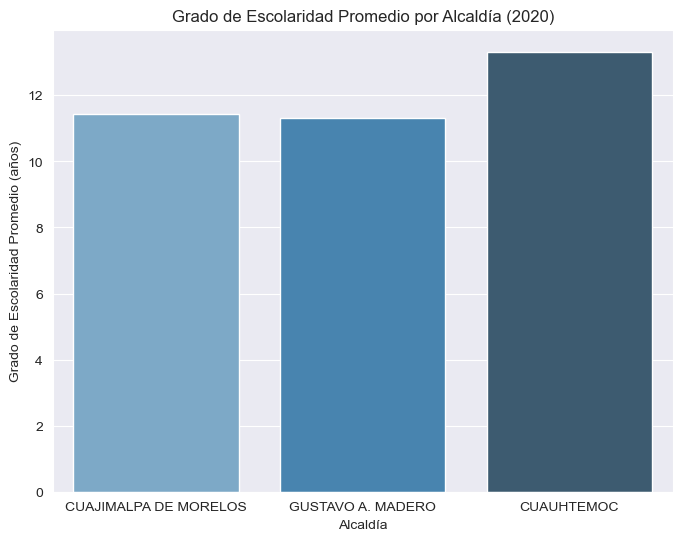

In [23]:
# 5.2.1. Visualización del Grado de Escolaridad Promedio por Alcaldía

plt.figure(figsize=(8,6))
sns.barplot(x='Municipio', y='Grado de escolaridad promedio', data=escolaridad, palette='Blues_d')
plt.xlabel('Alcaldía')
plt.ylabel('Grado de Escolaridad Promedio (años)')
plt.title('Grado de Escolaridad Promedio por Alcaldía (2020)')
plt.show()


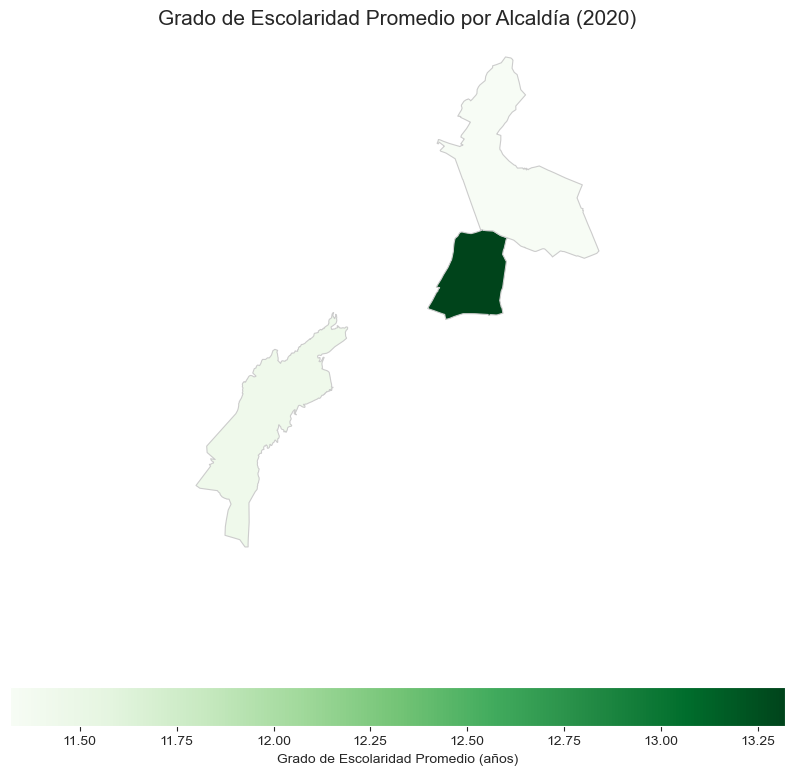

In [24]:
# 5.2.2. Visualización Geoespacial del Grado de Escolaridad Promedio

# Renombrar la columna 'Municipio' a 'NOMGEO' para facilitar el merge
escolaridad = escolaridad.rename(columns={'Municipio': 'NOMGEO'})

# Merge de los datos de escolaridad con el GeoDataFrame de las alcaldías
agebs = agebs.merge(escolaridad, on='NOMGEO')

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 10))

# Creación del mapa choropleth
agebs.plot(column='Grado de escolaridad promedio',
           cmap='Greens',
           linewidth=0.8,
           ax=ax,
           edgecolor='0.8',
           legend=True,
           legend_kwds={'label': "Grado de Escolaridad Promedio (años)",
                       'orientation': "horizontal"})

# Añadir etiquetas y título
plt.title('Grado de Escolaridad Promedio por Alcaldía (2020)', fontsize=15)
plt.axis('off')  # Ocultar ejes

# Mostrar el mapa
plt.show()

### 5.3. Conteo de Escuelas en las Alcaldías de Interés

En esta sección, analizamos la cantidad de **escuelas públicas** y **escuelas privadas** en las alcaldías de interés seleccionadas:
- **CUAUHTEMOC**
- **GUSTAVO A. MADERO**
- **CUAJIMALPA DE MORELOS**

Utilizaremos dos datasets:
- `escuelas_privadas.csv`
- `escuelas_publicas.csv`

Nuestro objetivo es obtener el número de escuelas de cada tipo por alcaldía.

In [25]:
# Carga de datasets de escuelas privadas y públicas
escuelas_privadas = pd.read_csv('escuelas_privadas.csv')
escuelas_publicas = pd.read_csv('escuelas_publicas.csv')

# Mostrar las primeras filas de cada dataset para verificar la carga
print("Escuelas Privadas:")
escuelas_privadas.head()

print("\nEscuelas Públicas:")
escuelas_publicas.head()

Escuelas Privadas:

Escuelas Públicas:


,nombre,domicilio,colonia,alcaldia,latitud,longitud
0,TELESECUNDARIA 63,"ADMON U HAB CAMPAÑA DEL EBANO Y C CELAYA S/N, ...",VICENTE GUERRERO SUPER MANZANA 6 (U HAB),IZTAPALAPA,19.353163,-99.054242
1,PREESCOLAR GENERAL CON SERVICIO ASISTENCIAL - ...,"PLAYA FLAMINGOS NO 1, MILITAR MARTE, DELEGACIO...",MILITAR MARTE,IZTACALCO,19.379224,-99.125583
2,PREESCOLAR GENERAL - ESTADO DE ZACATECAS,"CANAL DE SAN JUAN Y SUR 14 C, AGRICOLA ORIENTA...",AGRICOLA ORIENTAL VI,IZTACALCO,19.392689,-99.059337
3,PRIMARIA GENERAL - PROFRA. AMANDA PALAFOX Y BAZ,"MONTE ELBRUZ NO 15, LOS VOLCANES, DELEGACION T...",LOS VOLCANES,TLALPAN,19.269762,-99.176748
4,PRIMARIA GENERAL - VALENTIN ZAMORA OROZCO,"RETORNO 33 Y 34 S/N, AVANTE, DELEGACION COYOAC...",AVANTE,COYOACAN,19.328474,-99.130933


In [26]:
# Filtrar escuelas privadas por alcaldías de interés
escuelas_privadas = escuelas_privadas[escuelas_privadas['alcaldia'].isin(alcaldias_interes)]
print("Escuelas Privadas Filtradas:")
escuelas_privadas.head()

# Filtrar escuelas públicas por alcaldías de interés
escuelas_publicas = escuelas_publicas[escuelas_publicas['alcaldia'].isin(alcaldias_interes)]
print("\nEscuelas Públicas Filtradas:")
escuelas_publicas.head()


Escuelas Privadas Filtradas:

Escuelas Públicas Filtradas:


,nombre,domicilio,colonia,alcaldia,latitud,longitud
14,PREESCOLAR GENERAL - 10 DE ABRIL,"CERRADA LEANDRO VALLE S/N, SAN LORENZO ACOPILC...",SAN LORENZO ACOPILCO (PBLO),CUAJIMALPA DE MORELOS,19.328958,-99.327216
16,PRIMARIA GENERAL - PROFRA. GUADALUPE MAYOL DE ...,"SARASATE NO 94 BIS, PERALVILLO, DELEGACION CUA...",MORELOS I,CUAUHTEMOC,19.450117,-99.131868
21,PRIMARIA GENERAL - NIÑOS HEROES,"CALLE SANTA RITA NO 230, LOMAS DEL PADRE, DELE...",LOMA DEL PADRE,CUAJIMALPA DE MORELOS,19.351992,-99.308974
29,PRIMARIA GENERAL - DR. SALVADOR ALLENDE,"BLVD DEL TEMOLUCO Y LA ESCOLLERA, CONJ HAB ACU...",ACUEDUCTO DE GUADALUPE (U HAB),GUSTAVO A. MADERO,19.524836,-99.148309
30,PRIMARIA GENERAL - REGENTE URUCHURTU,"CALLE 1 NO 26, SAN JOSE DE LA ESCALERA, DELEGA...",SAN JOSE DE LA ESCALERA,GUSTAVO A. MADERO,19.523200,-99.164108


#### Conteo de Escuelas por Alcaldía

Calculamos la cantidad de escuelas privadas y públicas en cada alcaldía de interés.

In [27]:
# Conteo de escuelas privadas por alcaldía
conteo_privadas = escuelas_privadas.groupby('alcaldia').size().reset_index(name='escuelas_privadas')
print("Conteo de Escuelas Privadas por Alcaldía:")
print(conteo_privadas)

# Conteo de escuelas públicas por alcaldía
conteo_publicas = escuelas_publicas.groupby('alcaldia').size().reset_index(name='escuelas_publicas')
print("\nConteo de Escuelas Públicas por Alcaldía:")
print(conteo_publicas)

# Combinar ambos conteos en un solo DataFrame
conteo_total_escuelas = pd.merge(conteo_privadas, conteo_publicas, on='alcaldia', how='outer').fillna(0)

# Reemplazar NaN por 0 y convertir a enteros
conteo_total_escuelas['escuelas_privadas'] = conteo_total_escuelas['escuelas_privadas'].astype(int)
conteo_total_escuelas['escuelas_publicas'] = conteo_total_escuelas['escuelas_publicas'].astype(int)

print("\nConteo Total de Escuelas por Alcaldía:")
conteo_total_escuelas

Conteo de Escuelas Privadas por Alcaldía:
                alcaldia  escuelas_privadas
0  CUAJIMALPA DE MORELOS                158
1             CUAUHTEMOC                189
2      GUSTAVO A. MADERO                467

Conteo de Escuelas Públicas por Alcaldía:
                alcaldia  escuelas_publicas
0  CUAJIMALPA DE MORELOS                 36
1             CUAUHTEMOC                218
2      GUSTAVO A. MADERO                368

Conteo Total de Escuelas por Alcaldía:


,alcaldia,escuelas_privadas,escuelas_publicas
0,CUAJIMALPA DE MORELOS,158,36
1,CUAUHTEMOC,189,218
2,GUSTAVO A. MADERO,467,368


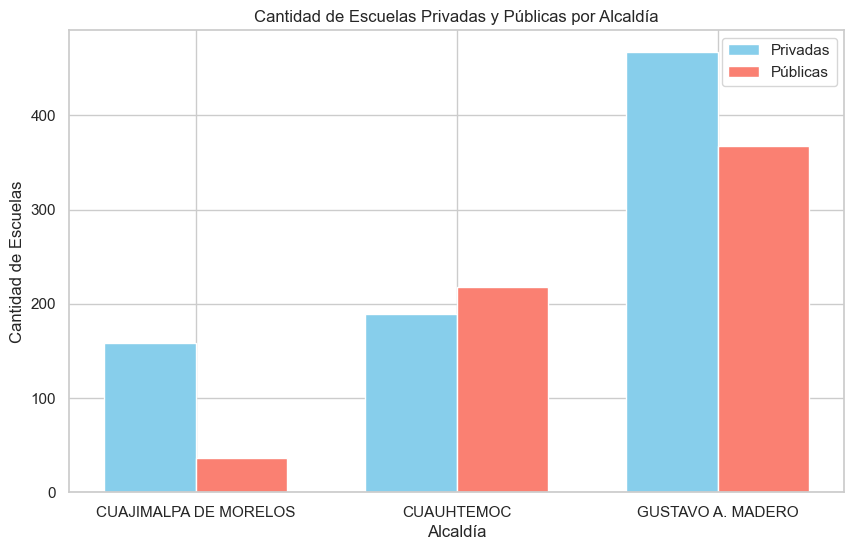

In [28]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Posición de las barras
bar_width = 0.35
index = np.arange(len(conteo_total_escuelas))

# Barras para escuelas privadas
bar1 = ax.bar(index, conteo_total_escuelas['escuelas_privadas'], bar_width, label='Privadas', color='skyblue')

# Barras para escuelas públicas
bar2 = ax.bar(index + bar_width, conteo_total_escuelas['escuelas_publicas'], bar_width, label='Públicas', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Alcaldía')
ax.set_ylabel('Cantidad de Escuelas')
ax.set_title('Cantidad de Escuelas Privadas y Públicas por Alcaldía')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(conteo_total_escuelas['alcaldia'])
ax.legend()

# Mostrar el gráfico
plt.show()


In [29]:
print(agebs.columns)
agebs

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'NOM_ENT', 'COV_', 'COV_ID',
       'AREA', 'PERIMETER', 'geometry', 'area_km2', 'densidad_poblacion',
       'Grado de escolaridad promedio'],
      dtype='object')


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry,area_km2,densidad_poblacion,Grado de escolaridad promedio
0,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459...",32.335245,16879.971159,13.32
1,09005,09,005,GUSTAVO A. MADERO,Ciudad de México,288,289,8737.830624,56403.558051,"POLYGON ((-99.11789 19.59059, -99.11860 19.584...",87.378306,13425.723734,11.32
2,09004,09,004,CUAJIMALPA DE MORELOS,Ciudad de México,289,290,7076.185866,66252.498897,"POLYGON ((-99.25581 19.40357, -99.25567 19.403...",70.761859,3058.116394,11.44


In [30]:
conteo_total_escuelas = conteo_total_escuelas.rename(columns={'alcaldia': 'NOMGEO'})

conteo_total_escuelas = conteo_total_escuelas.merge(agebs, on='NOMGEO')

conteo_total_escuelas = conteo_total_escuelas[['NOMGEO', 'escuelas_privadas', 'escuelas_publicas', 'area_km2']]

In [31]:
conteo_total_escuelas['densidad_escuelas_privadas'] = conteo_total_escuelas['escuelas_privadas'] / conteo_total_escuelas['area_km2']
conteo_total_escuelas['densidad_escuelas_publicas'] = conteo_total_escuelas['escuelas_publicas'] / conteo_total_escuelas['area_km2']

conteo_total_escuelas = conteo_total_escuelas[['NOMGEO', 'densidad_escuelas_privadas', 'densidad_escuelas_publicas']]
conteo_total_escuelas

,NOMGEO,densidad_escuelas_privadas,densidad_escuelas_publicas
0,CUAJIMALPA DE MORELOS,2.232841,0.508749
1,CUAUHTEMOC,5.845015,6.741869
2,GUSTAVO A. MADERO,5.344576,4.211572


In [32]:
print(conteo_total_escuelas.columns)

Index(['NOMGEO', 'densidad_escuelas_privadas', 'densidad_escuelas_publicas'], dtype='object')


### 5.4. Análisis del Uso de Suelo No Residencial

En esta sección, analizamos el **Uso de Suelo No Residencial** en las alcaldías de interés seleccionadas:
- **CUAUHTEMOC**
- **GUSTAVO A. MADERO**
- **CUAJIMALPA DE MORELOS**

Utilizaremos el dataset `usoDeSuelo.csv`, que contiene información sobre la descripción del uso del suelo en cada alcaldía. Nuestro objetivo es identificar y visualizar los diferentes tipos de uso de suelo no residencial presentes en estas áreas.

In [33]:
# Carga del dataset de Uso de Suelo
dfUsoDeSuelo = pd.read_csv('usoDeSuelo.csv')

# Mostrar las primeras filas del dataset para verificar la carga
print("Dimensiones del Dataset de Uso de Suelo:", dfUsoDeSuelo.shape)
dfUsoDeSuelo.head()

Dimensiones del Dataset de Uso de Suelo: (235931, 2)


,alcaldia,uso_descripcion
0,GUSTAVO A. MADERO,Habitacional
1,GUSTAVO A. MADERO,Habitacional con Comercio en Planta Baja
2,GUSTAVO A. MADERO,Habitacional
3,GUSTAVO A. MADERO,Habitacional
4,GUSTAVO A. MADERO,Habitacional con Comercio en Planta Baja


In [34]:
print(dfUsoDeSuelo.shape)
dfUsoDeSuelo['uso_descripcion'].value_counts()

(235931, 2)


uso_descripcion
Habitacional con Comercio en Planta Baja                                                                                                  111531
Habitacional                                                                                                                               69650
Habitacional con Comercio                                                                                                                  16814
Habitacional Mixto                                                                                                                          8652
Sin Zonificación                                                                                                                            4053
Habitacional con Oficinas                                                                                                                   3326
Preservación Ecológica                                                                                            

In [35]:
usos_comercio_servicios = [
    "Comercio y Servicios",
    "Habitacional con Comercio en Planta Baja",
    "Habitacional con Comercio",
    "Habitacional (Con comercio y/o Servicio en P.B. H-3-20 o 10 m)",
    "Habitacional con Oficinas",
    "Habitacional con Oficinas y/o Servicios Turísticos con Comercio en P.B.",
    "Habitacional con Comercio solo en P.B.",
    "Habitacional con Comercio HC-3-20 o m",
    "Centro Comercial",
    "Corredor de Servicios Urbanos",
    "Habitacional con Entretenimiento",
    "Habitacional con Entretenimiento *(Número de niveles de acuerdo a los criterios para determinar las alturas en Zona Histórica)",
    "Habitacional con Comercio en Planta Baja *(Número de niveles de acuerdo a los criterios para determinar las alturas en Zona Histórica)",
    "Habitacional con Oficinas *(Número de niveles de acuerdo a los criterios para determinar las alturas en Zona Histórica)"
]

dfUsoDeSuelo = dfUsoDeSuelo.groupby('alcaldia').size().reset_index(name='total_usos_suelo')
dfUsoDeSuelo

,alcaldia,total_usos_suelo
0,CUAJIMALPA DE MORELOS,15573
1,CUAUHTEMOC,44657
2,GUSTAVO A. MADERO,175701


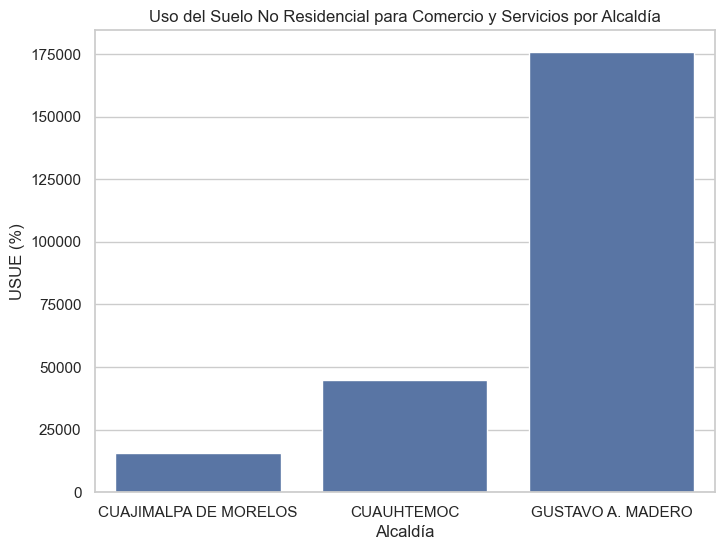

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='alcaldia', y='total_usos_suelo', data=dfUsoDeSuelo)
plt.xlabel('Alcaldía')
plt.ylabel('USUE (%)')
plt.title('Uso del Suelo No Residencial para Comercio y Servicios por Alcaldía')
plt.show()

### 5.5. Camaras de vigilancia del C5I

In [42]:
dfCamaras = pd.read_csv('camarasC5I.csv')
dfCamaras = dfCamaras[dfCamaras['Delegación'].isin(alcaldias_interes)]
dfCamaras.head()

,Delegación,Total Cámaras
4,CUAJIMALPA DE MORELOS,266
5,CUAUHTEMOC,1639
6,GUSTAVO A. MADERO,1992
